# 4 - Data Regorganization

## 4.1 Pivot Tables

importando librerias

In [1]:
# importnado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cargando datos

In [2]:
indx = pd.read_csv('indice_ocde.csv')

In [3]:
indx.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


explorar algunas columnas

In [4]:
indx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               2369 non-null   object 
 1   Country                2369 non-null   object 
 2   INDICATOR              2369 non-null   object 
 3   Indicator              2369 non-null   object 
 4   MEASURE                2369 non-null   object 
 5   Measure                2369 non-null   object 
 6   INEQUALITY             2369 non-null   object 
 7   Inequality             2369 non-null   object 
 8   Unit Code              2369 non-null   object 
 9   Unit                   2369 non-null   object 
 10  PowerCode Code         2369 non-null   int64  
 11  PowerCode              2369 non-null   object 
 12  Reference Period Code  0 non-null      float64
 13  Reference Period       0 non-null      float64
 14  Value                  2369 non-null   float64
 15  Flag

In [5]:
indx.Country.is_unique

False

In [ ]:
indx.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [6]:
indx[indx.Country == "Austria"][:2]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
36,AUT,Austria,CG_SENG,Stakeholder engagement for developing regulations,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,1.3,NaN,NaN


In [9]:
indx["Indicator"].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Feeling safe walking alone at night', 'Rooms per person',
       'Household net adjusted disposable income', 'Household net wealth',
       'Employment rate', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network',
       'Educational attainment', 'Student skills', 'Years in education',
       'Air pollution', 'Water quality', 'Voter turnout',
       'Life expectancy', 'Self-reported health', 'Life satisfaction',
       'Homicide rate', 'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

Vamos a pivotear la tabla de indicadores para cada país

In [7]:
df = indx.pivot_table(index='Country', columns='Indicator', values='Value')

In [8]:
df.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.000000,12.366667,73.0,67.333333,0.933333,37433.0,528768.0,19.4,...,55206.0,93.8,NaN,86.6,2.7,501.2,14.270000,92.0,92.000000,20.333333
Austria,12.2,0.8,85.666667,5.266667,72.0,85.666667,0.500000,37001.0,309637.0,20.8,...,53132.0,93.0,1.6,71.6,1.3,489.2,14.506667,76.0,91.666667,17.000000


Ahora queremos que a parte de tener organizados en las filas los piases, también queremos tener un separación por ineqality. Y además que en la parte de las columnas tenga el porcentaje que hace referencia al valor de la tabla

In [10]:
df_multi = indx.pivot_table(index=['Country','Inequality'], columns=['Unit','Indicator'], values='Value')

In [12]:
df_multi.head(10)

Unit                     Average score  \
Indicator            Life satisfaction   
Country   Inequality                     
Australia High                     7.4   
          Low                      7.0   
          Men                      7.1   
          Total                    7.1   
          Women                    7.2   
Austria   High                     7.6   
          Low                      7.2   
          Men                      7.1   
          Total                    7.2   
          Women                    7.3   

Unit                                                                    \
Indicator            Stakeholder engagement for developing regulations   
Country   Inequality                                                     
Australia High                                                     NaN   
          Low                                                      NaN   
          Men                                                      NaN   
          Total                                                    2.7   
          Women                                                    NaN   
Austria   High                                                     NaN   
          Low                                                      NaN   
          Men                                                      NaN   
          Total                                                    1.3   
          Women                                                    NaN   

Unit                                                                    Hours  \
Indicator            Student skills Time devoted to leisure and personal care   
Country   Inequality                                                            
Australia High                549.0                                       NaN   
          Low                 460.0                                       NaN   
          Men                 495.0                                     14.80   
          Total               499.0                                     14.36   
          Women               503.0                                     13.65   
Austria   High                533.0                                       NaN   
          Low                 440.0                                       NaN   
          Men                 489.0                                     14.70   
          Total               491.0                                     14.51   
          Women               493.0                                     14.31   

Unit                 Micrograms per cubic metre  \
Indicator                         Air pollution   
Country   Inequality                              
Australia High                              NaN   
          Low                               NaN   
          Men                               NaN   
          Total                             6.7   
          Women                             NaN   
Austria   High                              NaN   
          Low                               NaN   
          Men                               NaN   
          Total                            12.2   
          Women                             NaN   

Unit                                         Percentage  \
Indicator            Dwellings without basic facilities   
Country   Inequality                                      
Australia High                                      NaN   
          Low                                       NaN   
          Men                                       NaN   
          Total                                     NaN   
          Women                                     NaN   
Austria   High                                      NaN   
          Low                                       NaN   
          Men                                       NaN   
          Total                                     0.8   
          Women                                     NaN   

Unit

## 4.2 Multi-Index

Para buscar los valores especificos de multiindices se utilizan tuplas
donde la jerarquia de los indices va de izquierda a derecha (level0, level1, level2, ...)

In [17]:
df_multi.loc[
     
             [
                 ("Austria","Total"),("Australia", "Men")
                 ],
             "Percentage"

             ]

,Indicator,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Housing expenditure,Labour market insecurity,Long-term unemployment rate,Quality of support network,Self-reported health,Voter turnout,Water quality
Country,Inequality,,,,,,,,,,,,
Austria,Total,0.8,86.0,5.3,72.0,86.0,20.8,2.3,1.3,92.0,71.0,76.0,92.0
Australia,Men,NaN,84.0,18.5,77.0,81.0,NaN,NaN,1.0,93.0,85.0,NaN,93.0


Si quiere obtener un grupo de los índices del data frame usar el nombre de
dicho grupo en la jerarquia del indice de columnas. Por ejemplo, si deseo mostrar
solo aquellos datos donde el indicador muestra sus valores en porcentaje usamos string
como fuese una tabla nomral en pandas

In [18]:
df_multi.loc[:,"Percentage"]

Indicator                 Dwellings without basic facilities  \
Country       Inequality                                       
Australia     High                                       NaN   
              Low                                        NaN   
              Men                                        NaN   
              Total                                      NaN   
              Women                                      NaN   
...                                                      ...   
United States High                                       NaN   
              Low                                        NaN   
              Men                                        NaN   
              Total                                      0.1   
              Women                                      NaN   

Indicator                 Educational attainment  \
Country       Inequality                           
Australia     High                           NaN   
              Low                            NaN   
              Men                           84.0   
              Total                         84.0   
              Women                         84.0   
...                                          ...   
United States High                           NaN   
              Low                            NaN   
              Men                           91.0   
              Total                         92.0   
              Women                         92.0   

Indicator                 Employees working very long hours  Employment rate  \
Country       Inequality                                                       
Australia     High                                      NaN              NaN   
              Low                                       NaN              NaN   
              Men                                      18.5             77.0   
              Total                                    12.5             73.0   
              Women                                     6.1             69.0   
...                                                     ...              ...   
United States High                                      NaN              NaN   
              Low                                       NaN              NaN   
              Men                                      13.9             72.0   
              Total                                    10.4             67.0   
              Women                                     6.6             62.0   

Indicator                 Feeling safe walking alone at night  \
Country       Inequality                                        
Australia     High                                        NaN   
              Low                                         NaN   
              Men                                        81.0   
              Total                                      67.0   
              Women                                      54.0   
...                                                       ...   
United States High                                        NaN   
              Low                                         NaN   
              Men                                        88.0   
              Total                                      78.0   
              Women                                      69.0   

Indicator                 Housing expenditure  Labour market insecurity  \
Country       Inequality                                                  
Australia     High                        NaN                       NaN   
              Low                         NaN                       NaN   
              Men                         NaN                       NaN   
              Total                      19.4                       3.1   
              Women                       NaN                       NaN   
...                                       ...                       ...   
Uni

Si quiero mostrar la columna de porcentaje que se refiere en especifico a un solo
indicaro usamos tuplas en columnas

In [46]:
df_multi.loc[:,[("Percentage","Self-reported health")]]

Unit                               Percentage
Indicator                Self-reported health
Country       Inequality                     
Australia     High                       93.0
              Low                        84.0
              Men                        85.0
              Total                      85.0
              Women                      86.0
...                                       ...
United States High                       95.0
              Low                        71.0
              Men                        88.0
              Total                      88.0
              Women                      87.0

[210 rows x 1 columns]

Ahora si deseamos hacer una peticion de un grupo especifico en el indice, y otro grupo 
especifico de las columnas, usamos tuplas en ambos lados

In [50]:
df_multi.loc[[("Austria","Total")],[("Percentage","Self-reported health")]].head(2)

,Unit,Percentage
,Indicator,Self-reported health
Country,Inequality,
Austria,Total,71.0


Y si deseamos mostrar más un grupo de datos en ecualquiera de los indices,
usamos más una de una tupla en la lista de cada de las entradas

In [59]:
df_multi.loc[
    [
        ("Mexico","Total"),
        ("Colombia","Total"), 
        ("United States","Total"),
        ("Switzerland","Total")
        ],
    [("Percentage","Self-reported health")]
    ]

,Unit,Percentage
,Indicator,Self-reported health
Country,Inequality,
Mexico,Total,66.0
Colombia,Total,80.0
United States,Total,88.0
Switzerland,Total,81.0


Ahora quiero obtener para la misma lista de tuplas de índices, pero con una 
varios elementos de porcentaje

In [63]:
df_multi.loc[
    [
        ("Mexico","Total"),
        ("Colombia","Total"), 
        ("United States","Total"),
        ("Switzerland","Total")
        ],
    [
        ("Percentage","Self-reported health"),
        ("Percentage", "Employment rate")
        ]
    ]

Unit                               Percentage                
Indicator                Self-reported health Employment rate
Country       Inequality                                     
Mexico        Total                      66.0            59.0
Colombia      Total                      80.0            58.0
United States Total                      88.0            67.0
Switzerland   Total                      81.0            80.0

### 4.2.2 - SliceIndex

Ahora si deseamos mostrar varios elementos de un grupo especifico, pero hacer en forma de lista y no de tuplas. Podemos usar SliceIndex sobre el grupo que deseamos.

Para ello tenemos que instancia SliceIndex

In [64]:
# Instanciando um objeto do tipo SliceIndex
idx = pd.IndexSlice

Para los paises seleccionados con el total de inequality, ahora seleccionamos las 
columnas de "Self-reported health", "Employment rate" del grupo de "Percentage"

In [68]:
# Ahora seleccionamos las columnas de Self-reported health", "Employment rate" 
df_multi.loc[
    [
        ("Mexico","Total"),
        ("Colombia","Total"), 
        ("United States","Total"),
        ("Switzerland","Total")
        ],
    idx[["Percentage"],["Self-reported health", "Employment rate"]]]

Unit                               Percentage                
Indicator                Self-reported health Employment rate
Country       Inequality                                     
Mexico        Total                      66.0            59.0
Colombia      Total                      80.0            58.0
United States Total                      88.0            67.0
Switzerland   Total                      81.0            80.0

Ahora selecccionamos todos los totales del index de Inequality, con las columnas
anteriormente seleccionadas

In [71]:
df_multi.loc[
    idx[
        :,
        ["Total"]
        ]
        ,
    idx[
        ["Percentage"],
        ["Self-reported health", "Employment rate"]
        ]
][:7]

Unit                           Percentage                
Indicator            Self-reported health Employment rate
Country   Inequality                                     
Australia Total                      85.0            73.0
Austria   Total                      71.0            72.0
Belgium   Total                      74.0            65.0
Brazil    Total                       NaN            57.0
Canada    Total                      89.0            70.0
Chile     Total                      60.0            56.0
Colombia  Total                      80.0            58.0

### 4.2.3 Dropleve

Sirve para eliminar niveles de los multi índices

In [81]:
# Elimines Inequality
df_multi.droplevel(1, axis=0).head(2)

Unit          Average score                                                    \
Indicator Life satisfaction Stakeholder engagement for developing regulations   
Country                                                                         
Australia               7.4                                               NaN   
Australia               7.0                                               NaN   

Unit                                                         Hours  \
Indicator Student skills Time devoted to leisure and personal care   
Country                                                              
Australia          549.0                                       NaN   
Australia          460.0                                       NaN   

Unit      Micrograms per cubic metre                         Percentage  \
Indicator              Air pollution Dwellings without basic facilities   
Country                                                                   
Australia                        NaN                                NaN   
Australia                        NaN                                NaN   

Unit                                                                \
Indicator Educational attainment Employees working very long hours   
Country                                                              
Australia                    NaN                               NaN   
Australia                    NaN                               NaN   

Unit                                                           ...  \
Indicator Employment rate Feeling safe walking alone at night  ...   
Country                                                        ...   
Australia             NaN                                 NaN  ...   
Australia             NaN                                 NaN  ...   

Unit                                                               Ratio  \
Indicator Self-reported health Voter turnout Water quality Homicide rate   
Country                                                                    
Australia                 93.0           NaN           NaN           NaN   
Australia                 84.0           NaN           NaN           NaN   

Unit                                                      US Dollar  \
Indicator Rooms per person Household net adjusted disposable income   
Country                                                               
Australia              NaN                                      NaN   
Australia              NaN                                      NaN   

Unit                                                       Years  \
Indicator Household net wealth Personal earnings Life expectancy   
Country                                                            
Australia                  NaN               NaN             NaN   
Australia                  NaN               NaN             NaN   

Unit                          
Indicator Years in education  
Country                       
Australia                NaN  
Australia                NaN  

[2 rows x 24 columns]

## 5.- Melt
Es el proceso inverso de Ivot Table

Vamos a juntar en un solo renglon las variables en id_vars

In [82]:
indx.melt(id_vars=["Country","Indicator","Inequality","Unit"], value_vars="Value").head(2)

,Country,Indicator,Inequality,Unit,variable,value
0,Australia,Labour market insecurity,Total,Percentage,Value,3.1
1,Austria,Labour market insecurity,Total,Percentage,Value,2.3


In [87]:
indx.loc[:,["Country","Indicator","Inequality","Unit", "Value"]].head(2)

,Country,Indicator,Inequality,Unit,Value
0,Australia,Labour market insecurity,Total,Percentage,3.1
1,Austria,Labour market insecurity,Total,Percentage,2.3


# 6.- Aggregations

## 6.1 - Groupby
Las agregaciones por Groupby son métodos para separar, aplicar y combinar

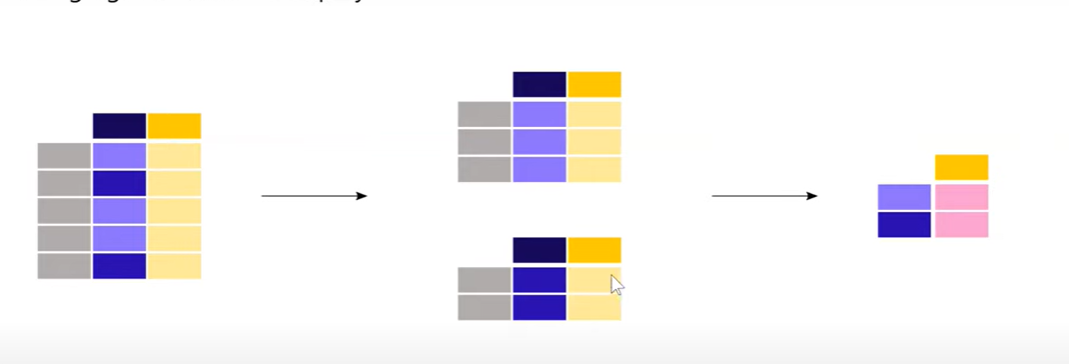

Una vez hecho lo anterior se agregan nuevas funciones, se calculan o transformar

In [110]:
indx.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN


Para accecer a un grupo especifico de los datos se una "get_group"

In [109]:
indx.groupby("Indicator").get_group("Life satisfaction").head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1722,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.1,NaN,NaN
1723,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,7.2,NaN,NaN


En cada grupo se puede aplicar operaciones ya predifinidas por pandas o se pueden
aplicar una que noostros construyamos

In [112]:
indx.groupby("Indicator").mean()

/tmp/ipykernel_15312/3161567369.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  indx.groupby("Indicator").mean()


,PowerCode Code,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Indicator,,,,,,
Air pollution,0.0,NaN,NaN,13.521429,NaN,NaN
Dwellings without basic facilities,0.0,NaN,NaN,4.261538,NaN,NaN
Educational attainment,0.0,NaN,NaN,78.130081,NaN,NaN
Employees working very long hours,0.0,NaN,NaN,7.115833,NaN,NaN
Employment rate,0.0,NaN,NaN,67.619048,NaN,NaN
Feeling safe walking alone at night,0.0,NaN,NaN,72.285714,NaN,NaN
Homicide rate,0.0,NaN,NaN,3.330952,NaN,NaN
Household net adjusted disposable income,0.0,NaN,NaN,29598.583333,NaN,NaN
Household net wealth,0.0,NaN,NaN,323959.633333,NaN,NaN


Podemos usar funciones que habíamos usado antes en pandas como describe sobre los grupbys

In [114]:
indx.groupby("Indicator").describe()["Value"]

,count,mean,std,min,25%,50%,75%,max
Indicator,,,,,,,,
Air pollution,42.0,13.521429,6.316163,5.50,8.725,12.10,17.000,28.5
Dwellings without basic facilities,39.0,4.261538,7.491526,0.00,0.200,0.70,5.300,35.9
Educational attainment,123.0,78.130081,15.515175,38.00,74.000,83.00,89.000,96.0
Employees working very long hours,120.0,7.115833,7.386633,0.10,2.000,4.60,9.750,33.0
Employment rate,126.0,67.619048,10.307944,30.00,65.000,70.00,74.000,84.0
Feeling safe walking alone at night,126.0,72.285714,15.709288,30.00,65.250,76.50,83.750,98.0
Homicide rate,126.0,3.330952,7.797050,0.10,0.500,0.80,1.875,50.5
Household net adjusted disposable income,36.0,29598.583333,8753.975532,9338.00,23756.750,29459.50,34909.000,51147.0
Household net wealth,30.0,323959.633333,182301.797043,79245.00,198978.250,294877.50,369389.250,941162.0


## 6.2 - Mul Index in Groupby

In [115]:
indx.groupby(["Country","Indicator"]).describe()["Value"]

count        mean  \
Country       Indicator                                                      
Australia     Air pollution                                1.0    6.700000   
              Educational attainment                       3.0   84.000000   
              Employees working very long hours            3.0   12.366667   
              Employment rate                              3.0   73.000000   
              Feeling safe walking alone at night          3.0   67.333333   
...                                                        ...         ...   
United States Student skills                               5.0  500.800000   
              Time devoted to leisure and personal care    3.0   14.553333   
              Voter turnout                                1.0   65.000000   
              Water quality                                3.0   88.000000   
              Years in education                           3.0   17.333333   

                                                               std     min  \
Country       Indicator                                                      
Australia     Air pollution                                    NaN    6.70   
              Educational attainment                      0.000000   84.00   
              Employees working very long hours           6.201075    6.10   
              Employment rate                             4.000000   69.00   
              Feeling safe walking alone at night        13.503086   54.00   
...                                                            ...     ...   
United States Student skills                             35.492253  460.00   
              Time devoted to leisure and personal care   0.255408   14.29   
              Voter turnout                                    NaN   65.00   
              Water quality                               2.000000   86.00   
              Years in education                          0.577350   17.00   

                                                            25%     50%  \
Country       Indicator                                                   
Australia     Air pollution                                6.70    6.70   
              Educational attainment                      84.00   84.00   
              Employees working very long hours            9.30   12.50   
              Employment rate                             71.00   73.00   
              Feeling safe walking alone at night         60.50   67.00   
...                                                         ...     ...   
United States Student skills                             493.00  495.00   
              Time devoted to leisure and personal care   14.43   14.57   
              Voter turnout                               65.00   65.00   
              Water quality                               87.00   88.00   
              Years in education                          17.00   17.00   

                                                             75%    max  
Country       Indicator                                                  
Australia     Air pollution                                6.700    6.7  
              Educational attainment                      84.000   84.0  
              Employees working very long hours           15.500   18.5  
              Employment rate                             75.000   77.0  
              Feeling safe walking alone at night         74.000   81.0  
...                                                          ...    ...  
United States Student skills                             498.000  558.0  
              Time devoted to leisure and personal care   14.685   14.8  
              Voter turnout                               65.000   65.0  
              Water quality                               89.000   90.0  
              Years in education                          17.500   18.0  

[935 rows x 8 columns]

## 6.3 - Aggregations

Las agregaciones son operaciones tanto construidas por pandas o python, como funciones
que sean creados por el usuario para aplicarlas a los grupos que nos interesan.

In [117]:
indx.groupby(["Country","Indicator"]).agg({"Value":["mean","std"]})

Value           
                                                               mean        std
Country       Indicator                                                       
Australia     Air pollution                                6.700000        NaN
              Educational attainment                      84.000000   0.000000
              Employees working very long hours           12.366667   6.201075
              Employment rate                             73.000000   4.000000
              Feeling safe walking alone at night         67.333333  13.503086
...                                                             ...        ...
United States Student skills                             500.800000  35.492253
              Time devoted to leisure and personal care   14.553333   0.255408
              Voter turnout                               65.000000        NaN
              Water quality                               88.000000   2.000000
              Years in education                          17.333333   0.577350

[935 rows x 2 columns]